#Preaparing the data

##Downloading the dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdulwadood11220/youtube-data-for-analytics-600-rows")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/youtube-data-for-analytics-600-rows


##Importing the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path + "/youtube_data.csv")
df.head()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail
0,gsJAlLOFBv0,TINY Tech That Actually Works,No description available,2025-05-02T17:37:10Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['tiny', 'tech', 'gadgets', 'small', 'miniature']",28,8962092.0,243350.0,515.0,PT57S,https://i.ytimg.com/vi/gsJAlLOFBv0/default.jpg
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18T12:39:53Z,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,PT7M50S,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01T11:00:06Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,PT47S,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08T18:04:31Z,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,PT31S,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22T16:49:00Z,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,PT16S,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg


##Viewing basic stats

In [3]:
for col in df.columns:
  print(col, df[col].nunique())
  print(col, df[col].isnull().sum())
  print(col, df[col].value_counts().nlargest(1))

video_id 581
video_id 0
video_id video_id
qF8-uaQJuBQ    2
Name: count, dtype: int64
title 573
title 0
title title
Amazing Power Full Tractor Work In The Field #tractor #farming #automobile #technology #shortvideo    4
Name: count, dtype: int64
description 439
description 0
description description
No description available    136
Name: count, dtype: int64
published_date 582
published_date 0
published_date published_date
2024-10-16T14:30:01Z    2
Name: count, dtype: int64
channel_id 409
channel_id 0
channel_id channel_id
UCMiJRAwDNSNzuYeN2uWa0pA    27
Name: count, dtype: int64
channel_title 408
channel_title 0
channel_title channel_title
Mrwhosetheboss    27
Name: count, dtype: int64
tags 328
tags 0
tags tags
['thailand', 'surin', 'style', 'travel', 'day', 'asia', 'elephant', 'bangkok', 'elephantnature', 'asian', 'animal', 'wildlife', 'chiang', 'african', 'asia', 'park', 'safari', 'big', 'travel', 'minneriya', 'thailand grass', 'art', 'green', 'ivory', 'ช้าง', 'ทองใบ', 'พลายทองใบ', 'หนุ่

##Convert the time into **seconds**

In [4]:
import re

def parse_iso8601_to_seconds(duration):
    m = re.match(r'P(?:(\d+)D)?T(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration)
    if not m:
        return 0  # Return 0 seconds if no match is found
    days = int(m.group(1)) if m.group(1) else 0
    hours = int(m.group(2)) if m.group(2) else 0
    minutes = int(m.group(3)) if m.group(3) else 0
    seconds = int(m.group(4)) if m.group(4) else 0
    return days * 86400 + hours * 3600 + minutes * 60 + seconds

df['duration_in_seconds'] = df['duration'].apply(parse_iso8601_to_seconds)
df.head()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail,duration_in_seconds
0,gsJAlLOFBv0,TINY Tech That Actually Works,No description available,2025-05-02T17:37:10Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['tiny', 'tech', 'gadgets', 'small', 'miniature']",28,8962092.0,243350.0,515.0,PT57S,https://i.ytimg.com/vi/gsJAlLOFBv0/default.jpg,57
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18T12:39:53Z,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,PT7M50S,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg,470
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01T11:00:06Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,PT47S,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg,47
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08T18:04:31Z,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,PT31S,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg,31
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22T16:49:00Z,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,PT16S,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg,16


##Analyzing the missing descriptions

In [5]:
df["missing_description"] = (df['description'] == "No description available")
df["missing_description"].value_counts()

,count
missing_description,
False,464
True,136


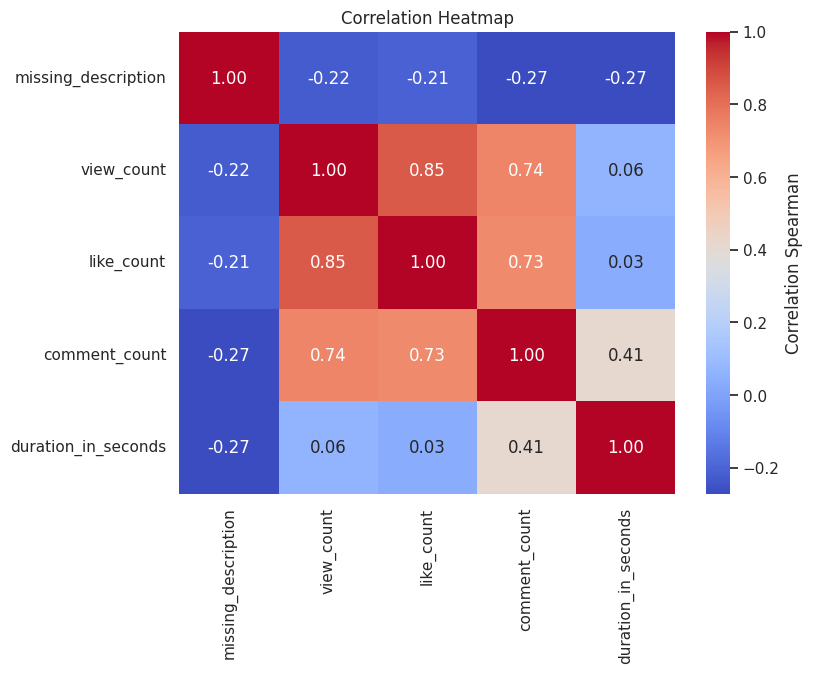

In [6]:
import re

def parse_iso8601_to_seconds(duration):
    m = re.match(r'P(?:(\d+)D)?T(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration)
    if not m:
        return 0
    days = int(m.group(1)) if m.group(1) else 0
    hours = int(m.group(2)) if m.group(2) else 0
    minutes = int(m.group(3)) if m.group(3) else 0
    seconds = int(m.group(4)) if m.group(4) else 0
    return days * 86400 + hours * 3600 + minutes * 60 + seconds

df['duration_in_seconds'] = df['duration'].apply(parse_iso8601_to_seconds)

column_of_interest = ["missing_description", "view_count", "like_count", "comment_count", "duration_in_seconds"]

correlation_matrix = df[column_of_interest].corr(method = 'spearman')

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Correlation Spearman"})
heatmap.set_title("Correlation Heatmap")
plt.show()

##Dropping no description rows

In [7]:
df = df[df['description'] != "No description available"]
df = df.dropna(subset=["description", "view_count", "like_count", "comment_count", "duration_in_seconds", "title"])
df = df.drop(columns=["missing_description", "duration"])
df = df[df["title"].str.split().str.len() > 2]
df = df[(df['view_count'] > 100) | (df['like_count'] == 0) | (df['comment_count'] == 0)]
df.head()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,thumbnail,duration_in_seconds
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18T12:39:53Z,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg,470
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01T11:00:06Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg,47
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08T18:04:31Z,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg,31
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22T16:49:00Z,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg,16
5,THw-wXt7wyM,5 Tech Myths Busted!,#shorts \n\nI spend a LOT of time trying to ma...,2022-10-02T19:40:14Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech', 'myths', 'busted', 'tips']",28,28131104.0,1956461.0,6253.0,https://i.ytimg.com/vi/THw-wXt7wyM/default.jpg,56


In [8]:
def remove_promotional_prefix(text):
    if not isinstance(text, str):
        return text

    promo_patterns = [
        r"^subscribe.*?\n",
        r"^follow me.*?\n",
        r"^check out.*?\n",
        r"^join my discord.*?\n",
        r"^support me.*?\n",
        r"^buy my merch.*?\n",
        r"^visit.*?\n",
        r"^https?://\S+\s*",
    ]

    pattern = re.compile("|".join(promo_patterns), re.IGNORECASE)

    for _ in range(3):
        match = pattern.match(text)
        if match:
            text = text[match.end():].lstrip()
        else:
            break

    return text

df["description"] = df["description"].apply(remove_promotional_prefix)

In [31]:
df["tagged_description"] = df["video_id"].astype(str) + " " + df["description"]
df.head()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,thumbnail,duration_in_seconds,tagged_description
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18T12:39:53Z,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg,470,"ypicIkaiViM Andrew Yang, Forward Party co-chai..."
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01T11:00:06Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg,47,1Nef8LPO-jo #shorts #technology \n\nI spend a ...
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08T18:04:31Z,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg,31,lCHqmzynO-s 💬 Join my Discord server: https://...
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22T16:49:00Z,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg,16,7uFrtqSwYzM Discover the revolutionary world o...
5,THw-wXt7wyM,5 Tech Myths Busted!,#shorts \n\nI spend a LOT of time trying to ma...,2022-10-02T19:40:14Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech', 'myths', 'busted', 'tips']",28,28131104.0,1956461.0,6253.0,https://i.ytimg.com/vi/THw-wXt7wyM/default.jpg,56,THw-wXt7wyM #shorts \n\nI spend a LOT of time ...


#Processing the texts

In [11]:
!pip install -U sentence-transformers

  Using cached sentence_transformers-5.0.0-py3-none-any.whl.metadata (16 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py

In [12]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[ 6.76568970e-02  6.34958893e-02  4.87131067e-02  7.93049634e-02
   3.74480449e-02  2.65277340e-03  3.93749550e-02 -7.09847454e-03
   5.93613833e-02  3.15369889e-02  6.00981116e-02 -5.29051647e-02
   4.06067669e-02 -2.59308256e-02  2.98428144e-02  1.12693582e-03
   7.35148862e-02 -5.03819585e-02 -1.22386619e-01  2.37028375e-02
   2.97265332e-02  4.24768403e-02  2.56337766e-02  1.99517491e-03
  -5.69190979e-02 -2.71598268e-02 -3.29035521e-02  6.60248324e-02
   1.19007103e-01 -4.58791293e-02 -7.26214647e-02 -3.25840004e-02
   5.23413382e-02  4.50552590e-02  8.25299695e-03  3.67024392e-02
  -1.39415637e-02  6.53918907e-02 -2.64272504e-02  2.06358891e-04
  -1.36642987e-02 -3.62810269e-02 -1.95043534e-02 -2.89738569e-02
   3.94270420e-02 -8.84091035e-02  2.62426748e-03  1.36714121e-02
   4.83063087e-02 -3.11565865e-02 -1.17329188e-01 -5.11690304e-02
  -8.85287896e-02 -2.18962505e-02  1.42986495e-02  4.44167927e-02
  -1.34815276e-02  7.43392929e-02  2.66382527e-02 -1.98762529e-02
   1.79191

In [14]:
import numpy as np

descriptions = df['description'].tolist()
description_embeddings = model.encode(descriptions, show_progress_bar=True)

df['description_embeddings'] = list(description_embeddings)

def recommend_video(description, df, model, top_n=5):
    input_embedding = model.encode([description])[0]

    similarities = np.dot(df['description_embeddings'].tolist(), input_embedding)

    most_similar_indices = np.argsort(similarities)[-top_n:][::-1]

    recommended_videos = df.iloc[most_similar_indices]
    return recommended_videos[['title', 'video_id', 'description', 'view_count', 'like_count', 'comment_count']]

example_description = "Learn about machine learning algorithms and data science concepts."
recommended = recommend_video(example_description, df, model)

print(f"Recommended videos for the description: '{example_description}'")
print(recommended)

first_video_description = df['description'].iloc[0]
recommended_from_video = recommend_video(first_video_description, df, model)

print(f"\nRecommended videos based on the description of the first video:")
recommended_from_video


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

Recommended videos for the description: 'Learn about machine learning algorithms and data science concepts.'
                                                 title     video_id  \
443  How Pakistan Stole Nuclear B*mb Technology? | ...  Zrss8I4mvu4   
183  IT vs. Computer Science Degrees: Which One Is ...  VmqH41dydeI   
439  The Evolution of Technology: A Journey with Ji...  kqXfvqIzpgs   
447  Top 10 Technologies To Learn In 2025 | Top Tre...  2rN0XTW8dU8   
450  Top 10 Technologies To Learn In 2025 | Top Tre...  2rN0XTW8dU8   

                                           description  view_count  \
443  Boost your career in Data Science, Software De...   1595996.0   
183  🔎 IT vs. Computer Science: Which Degree Is Rig...    158437.0   
439  Jim Al-Khalili explores the history of compute...    186040.0   
447  In this video on the Top 10 Technologies to Le...    740105.0   
450  In this video on the Top 10 Technologies to Le...    740105.0   

     like_count  comment_count  
443     58

,title,video_id,description,view_count,like_count,comment_count
1,AI & future of workforce: Andrew Yang on how t...,ypicIkaiViM,"Andrew Yang, Forward Party co-chair and former...",289626.0,3393.0,1240.0
254,Future Technology | 60 Minutes Marathon,wrJsExM8D-o,"From December 2023, Scott Pelley’s report on q...",4944688.0,38775.0,2280.0
376,Elon Musk and President Trump Feud Impacts Tes...,twFO7qaGMxU,Bloomberg’s Caroline Hyde and Ed Ludlow discus...,9923.0,166.0,24.0
508,China's slaughterbots show WW3 would kill us all.,6D4rsqxqSIc,OpenAI o3 and China. Learn more about AI at ht...,2814241.0,53773.0,10486.0
56,China’s New Tech Shocks the U.S. — The World ...,xxVgTfq2Xkg,"In 2025, China tech is no longer just catching...",49857.0,921.0,95.0
